# ATO all from Dinithi
# Plot for manuscript figures
# 24 Nov 2022 Chenqu

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb

sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]

In [2]:
sb.set_palette('tab10')

In [3]:
vega_20 = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728',
    '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2',
    '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
]

In [4]:
ato_cmap = { 
    'PRIMITIVE_STREAK': vega_20[19],
    'IPSC':  vega_20[15],
    'OTHER_NONIMMUNE': vega_20[12],
    'HAEM_PROGENITOR':  vega_20[13],
    'MEGA/ERY':  vega_20[11],
    'MYELOID':  vega_20[10],
    'MESODERM':  vega_20[17],
    'ENDOTHELIUM':vega_20[18],
    'DN/DP':vega_20[0],
    'ABT(ENTRY)':vega_20[5],
    'SP_T':vega_20[7],
    'NK': vega_20[8],
    'ILC3':vega_20[9]
           }

In [5]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/ATO_collab_manuscript/Chenqu_old/ATO_merge_Dinithi/

/lustre/scratch117/cellgen/team205/cs42/ATO_collab_manuscript/Chenqu_old/ATO_merge_Dinithi


In [6]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/thymic organoid/github_output/'
sc.settings.figdir = fig_path

# Load data

In [7]:
adata = sc.read('/lustre/scratch117/cellgen/team205/ds40/shared/ToChenqu_16122021/ATO_full_scvi_4_with_new_annotations_7.h5ad')

In [8]:
adata.obs_names = adata.obs['sanger_sample_id'].astype('str') +'-'+ [name.split('-')[0] for name in adata.obs_names]

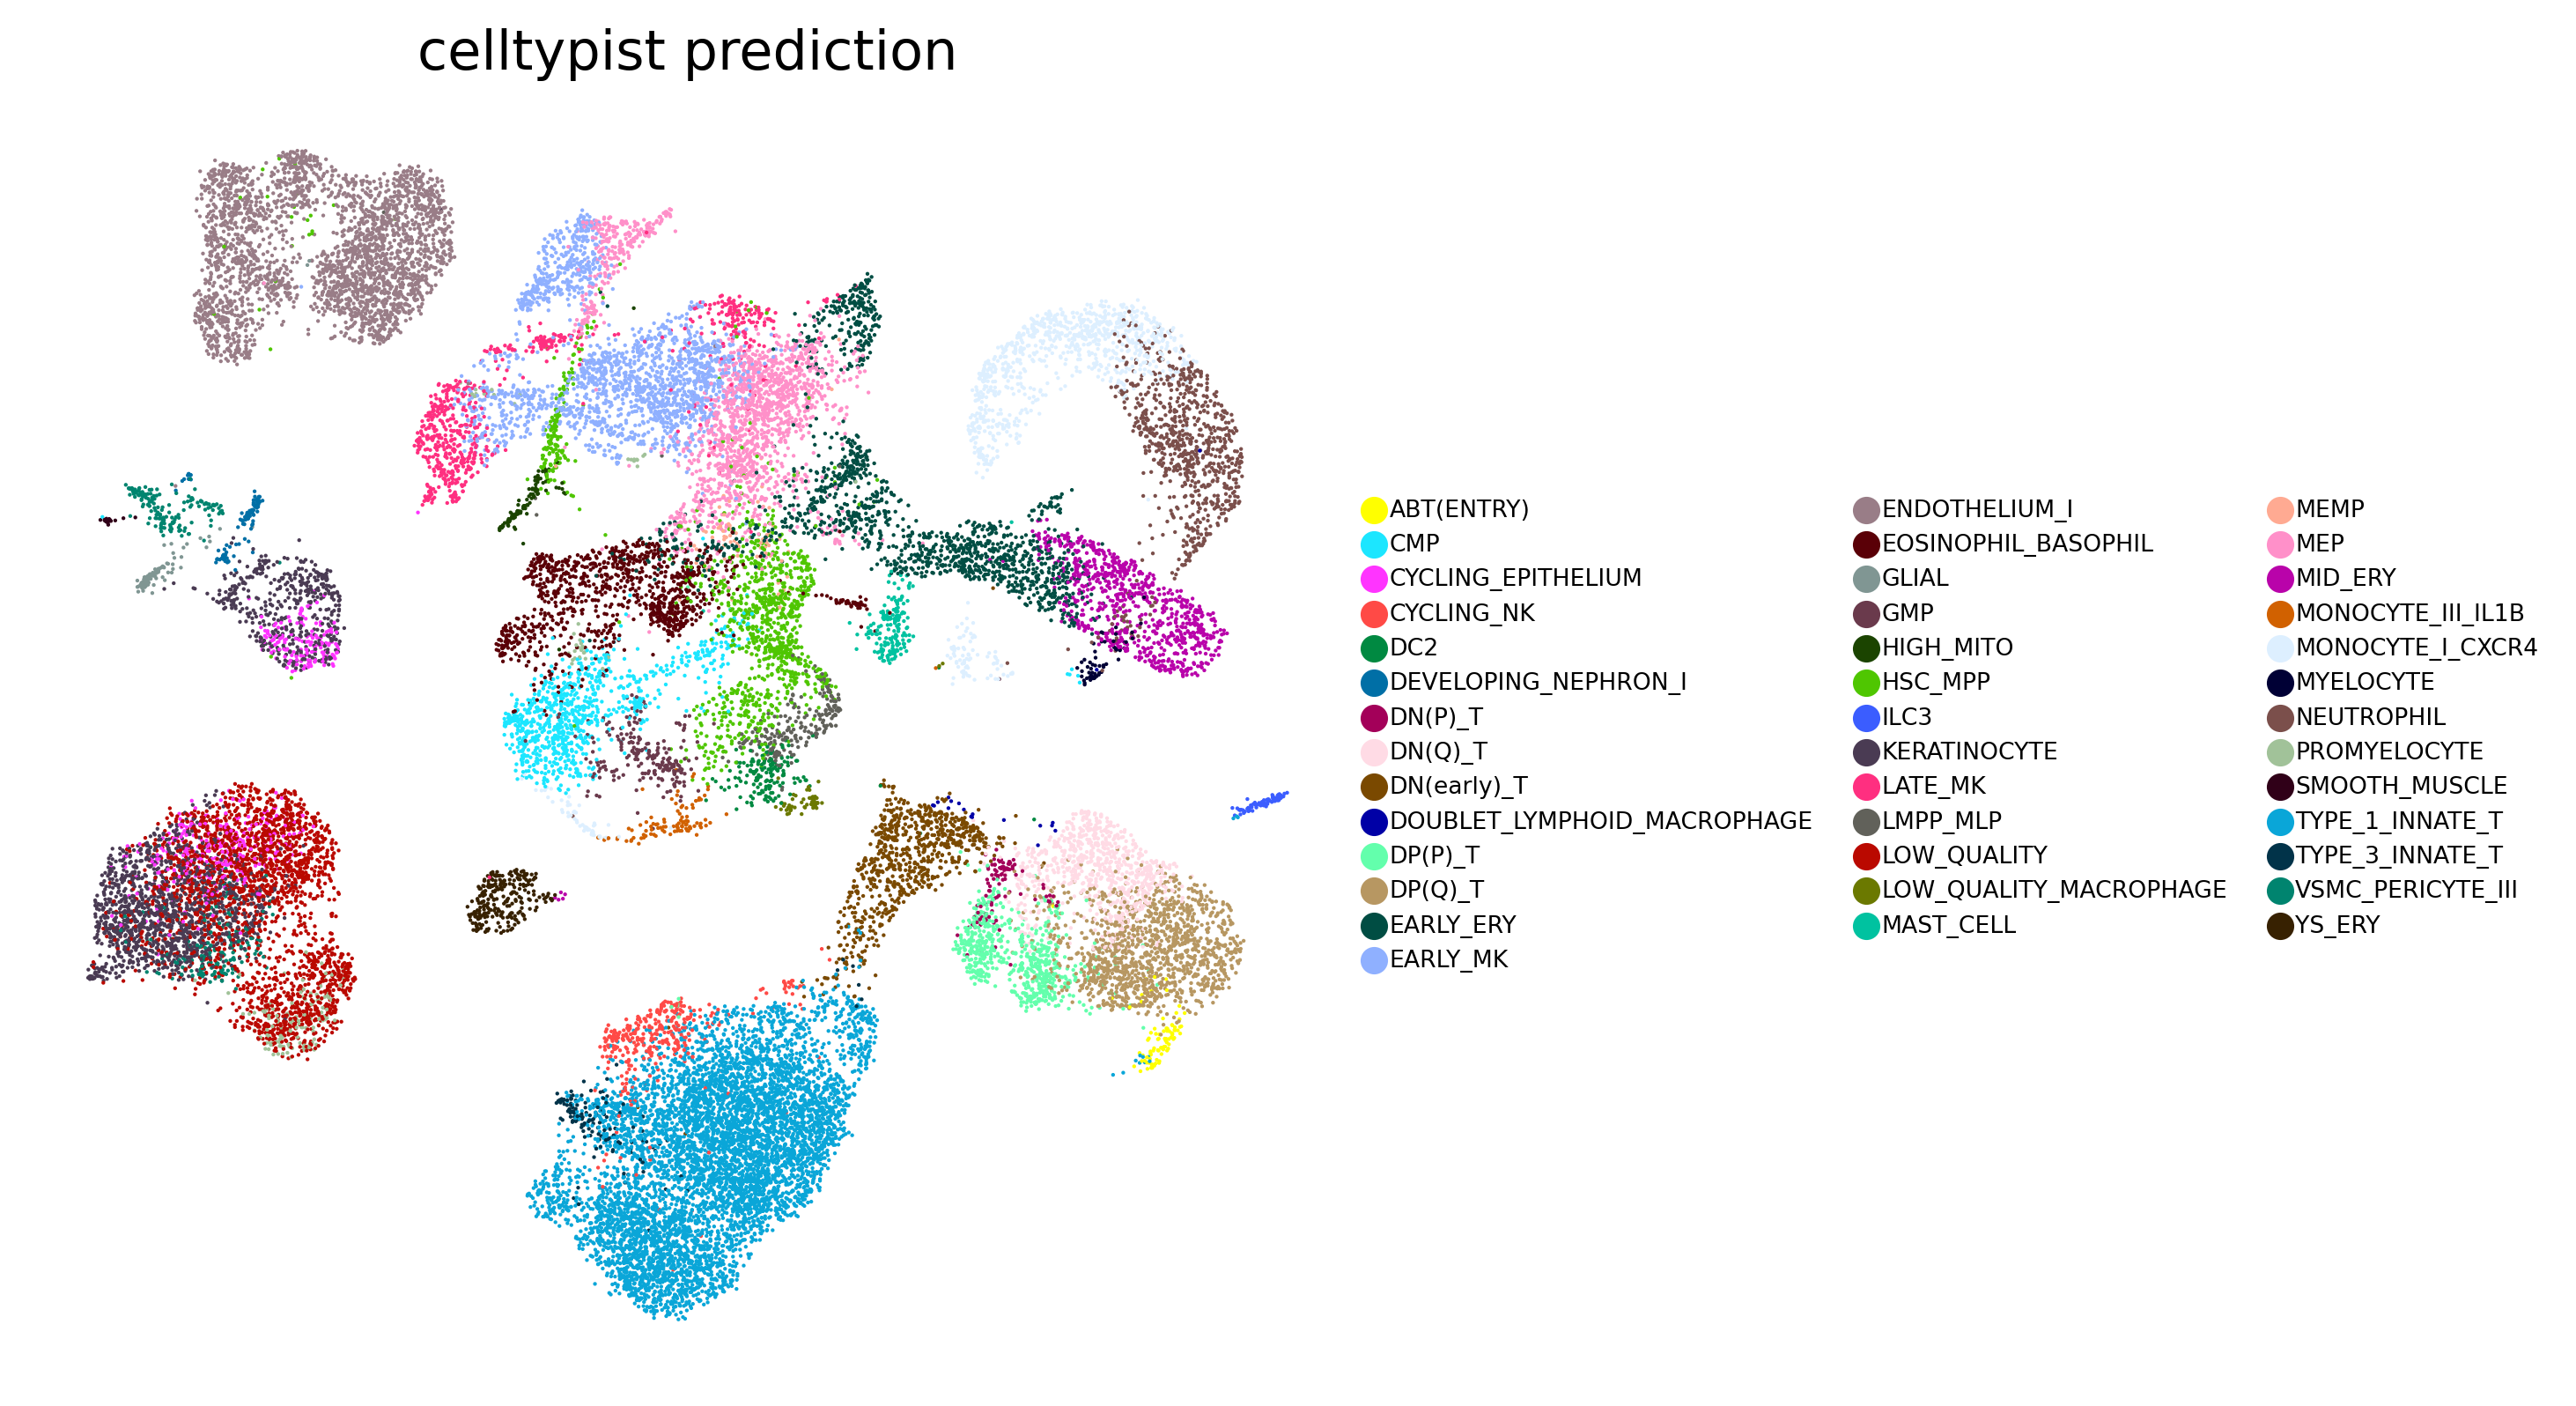

In [18]:
sc.pl.umap(adata, color=['celltypist_panfetal_predictions'],title=['celltypist prediction'],legend_loc='right margin',frameon=False,legend_fontsize=6,save='annotation_prediction.pdf')

In [13]:
adata.obs['new_annotation'] = adata.obs['new_annotation'].cat.reorder_categories(['IPSC','PRIMITIVE_STREAK','MESODERMAL_PROGENITOR','VSMC_PERICYTE','EPITHELIUM','GLIAL','NEURON_PROGENITOR','ENDOTHELIUM',
                                                                          'HSC_MPP','HSC_MPP/LMPP_MLP/DC2','CMP','GMP/MONOCYTE','MYELOCYTE','NEUTROPHIL','EOSINOPHIL_BASOPHIL','MAST CELL',
                                                                         'MONOCYTE','MONOCYTE/MACROPHAGE','MEP','EARLY_ERY','MID_ERY','YS_ERY','MK',
                                                                          'DN(EARLY)_T', 'DN_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)', 'SP_T','NK','ILC3'
                                                                         ])

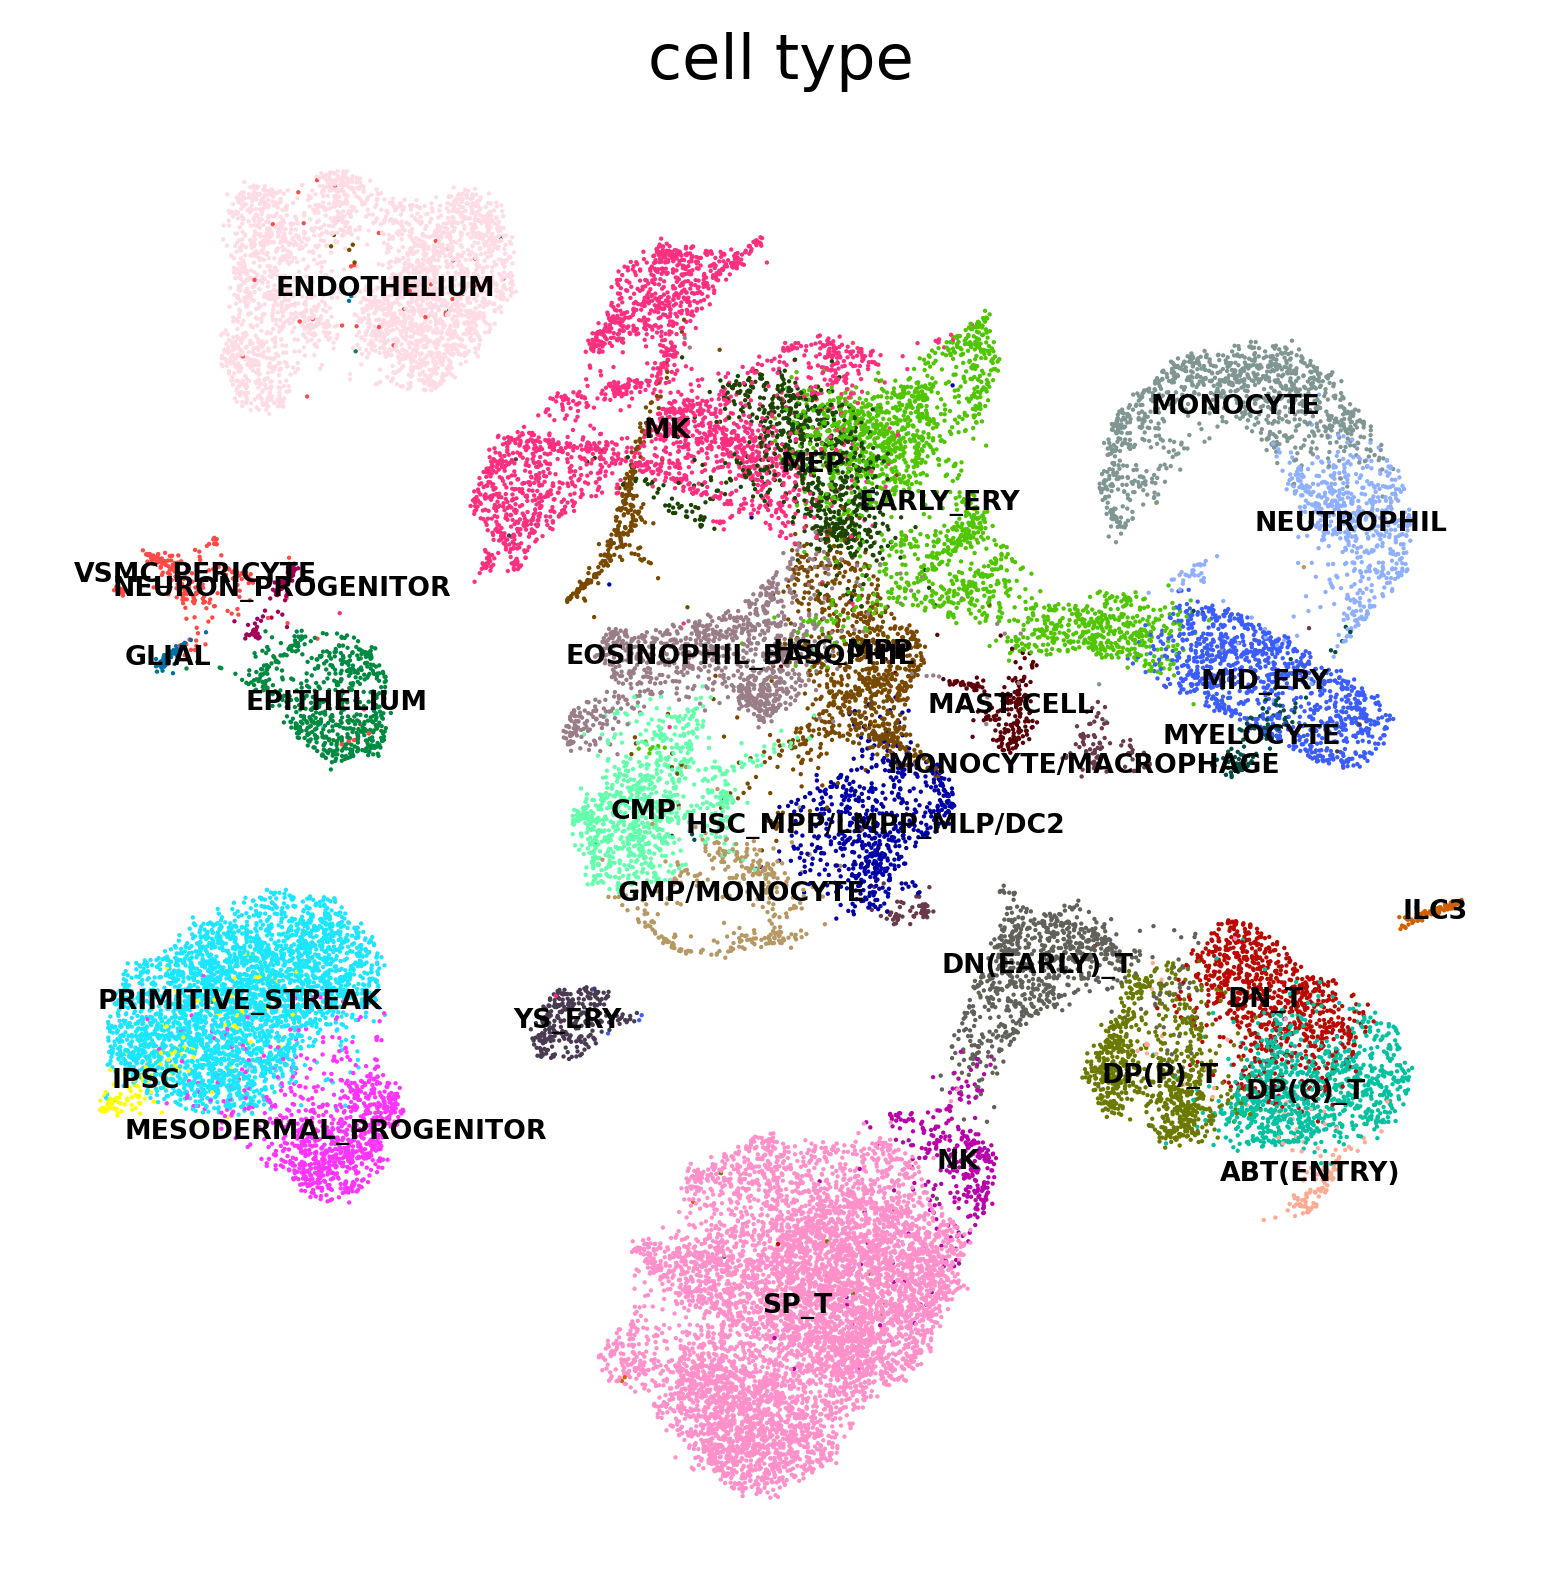

In [15]:
sc.pl.umap(adata, color=['new_annotation'],title=['cell type'],legend_loc='on data',frameon=False,legend_fontsize=6,save='annotation_combine.pdf')

set anno_lvl_0 to more rough annotations

In [12]:
adata.obs['anno_lvl_0'] = adata.obs['new_annotation'].astype('str')
#adata.obs.loc[adata.obs['anno_lvl_0'].isin(['IPSC','PRIMITIVE_STREAK']),'anno_lvl_0'] = 'STEM_CELL'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['MESODERMAL_PROGENITOR']),'anno_lvl_0'] = 'MESODERM'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['VSMC_PERICYTE','EPITHELIUM','GLIAL','NEURON_PROGENITOR']),'anno_lvl_0'] = 'OTHER_NONIMMUNE'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['HSC_MPP','HSC_MPP/LMPP_MLP/DC2']),'anno_lvl_0'] = 'HAEM_PROGENITOR'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['CMP','GMP/MONOCYTE','MYELOCYTE','NEUTROPHIL','EOSINOPHIL_BASOPHIL','MAST CELL',
                                            'MONOCYTE','MONOCYTE/MACROPHAGE']),'anno_lvl_0'] = 'MYELOID'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['MEP','EARLY_ERY','MID_ERY','YS_ERY','MK']),'anno_lvl_0'] = 'MEGA/ERY'
adata.obs.loc[adata.obs['anno_lvl_0'].isin(['DN(EARLY)_T', 'DN_T', 'DP(P)_T', 'DP(Q)_T']),'anno_lvl_0'] = 'DN/DP'


In [13]:
adata.obs['anno_lvl_0'] = adata.obs['anno_lvl_0'].astype('category')

In [14]:
adata.obs['anno_lvl_0'] = adata.obs['anno_lvl_0'].cat.reorder_categories(['IPSC','PRIMITIVE_STREAK','MESODERM','OTHER_NONIMMUNE','ENDOTHELIUM', 
                                                                         'HAEM_PROGENITOR', 'MYELOID','MEGA/ERY',
                                                                         'DN/DP','ABT(ENTRY)', 'SP_T','NK','ILC3'])

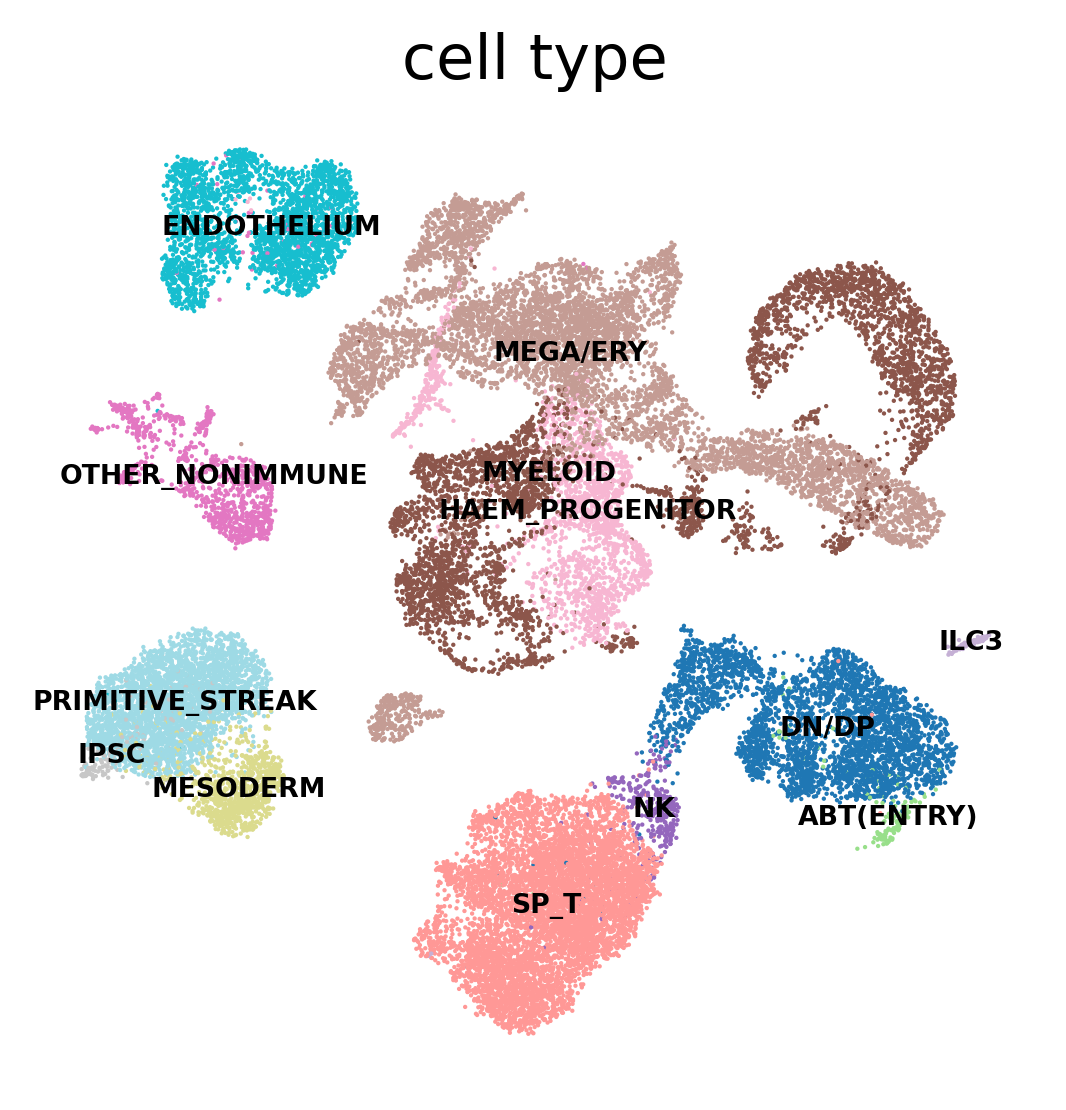

In [17]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(adata, color=['anno_lvl_0'],title=['cell type'],legend_loc='on data',frameon=False,legend_fontsize=6,palette=ato_cmap,save='annotation_combine_lowlvl.pdf')

# Cluster counter 

In [18]:
test = adata.obs['ATO_days'].astype('category')

In [19]:
cluster_counter = pd.DataFrame(columns =list(adata.obs['anno_lvl_0'].cat.categories), index = list(test.cat.categories),dtype='int')

In [20]:
for i in range(cluster_counter.columns.shape[0]):
    annot = cluster_counter.columns[i]
    
    for j in range(cluster_counter.index.shape[0]):
        days = cluster_counter.index[j]
        counter = Counter(adata.obs.loc[(adata.obs['ATO_days']== days), 'anno_lvl_0'])
        
        cluster_counter.iloc[j][annot] = counter[annot] 

In [21]:
cluster_counter

IPSC  PRIMITIVE_STREAK  MESODERM  OTHER_NONIMMUNE  ENDOTHELIUM  \
-14  132.0            3176.0     864.0              2.0          3.0   
-7     0.0               0.0       0.0            120.0       1207.0   
 0     0.0               1.0       0.0            900.0       1536.0   
 7     0.0               0.0       0.0              2.0          0.0   
 20    0.0               0.0       0.0              0.0          0.0   
 37    0.0               0.0       0.0              0.0          0.0   
 50    0.0               0.0       0.0             17.0          0.0   

     HAEM_PROGENITOR  MYELOID  MEGA/ERY   DN/DP  ABT(ENTRY)    SP_T     NK  \
-14              0.0      0.0       0.0     0.0         0.0     0.0    0.0   
-7            1291.0     26.0    3237.0     0.0         0.0     0.0    0.0   
 0             549.0   2304.0    1430.0     1.0         0.0     0.0    0.0   
 7              15.0   2080.0    1613.0   748.0         0.0     3.0   49.0   
 20              1.0     12.0     264.0  1189.0        31.0    24.0  268.0   
 37              0.0      7.0       1.0   804.0        31.0   903.0   27.0   
 50              1.0     19.0       0.0   724.0        74.0  5705.0    5.0   

     ILC3  
-14   0.0  
-7    0.0  
 0    0.0  
 7    9.0  
 20  42.0  
 37   8.0  
 50  28.0

In [22]:
cluster_counter_percentage = cluster_counter.copy()

In [23]:
for i in range(cluster_counter_percentage.shape[0]):
    cluster_counter_percentage.iloc[i] = cluster_counter_percentage.iloc[i] / pd.DataFrame.sum(cluster_counter_percentage,axis=1).iloc[i] * 100

In [24]:
cluster_counter_percentage # this is the percentage of each cell type in each sample

IPSC  PRIMITIVE_STREAK   MESODERM  OTHER_NONIMMUNE  ENDOTHELIUM  \
-14  3.160163         76.035432  20.684702         0.047881     0.071822   
-7   0.000000          0.000000   0.000000         2.040469    20.523720   
 0   0.000000          0.014879   0.000000        13.390864    22.853742   
 7   0.000000          0.000000   0.000000         0.044258     0.000000   
 20  0.000000          0.000000   0.000000         0.000000     0.000000   
 37  0.000000          0.000000   0.000000         0.000000     0.000000   
 50  0.000000          0.000000   0.000000         0.258634     0.000000   

     HAEM_PROGENITOR    MYELOID   MEGA/ERY      DN/DP  ABT(ENTRY)       SP_T  \
-14         0.000000   0.000000   0.000000   0.000000    0.000000   0.000000   
-7         21.952049   0.442102  55.041660   0.000000    0.000000   0.000000   
 0          8.168427  34.280613  21.276596   0.014879    0.000000   0.000000   
 7          0.331932  46.027882  35.693738  16.552335    0.000000   0.066386   
 20         0.054615   0.655380  14.418351  64.937193    1.693064   1.310759   
 37         0.000000   0.393038   0.056148  45.143178    1.740595  50.701853   
 50         0.015214   0.289061   0.000000  11.014757    1.125818  86.794462   

            NK      ILC3  
-14   0.000000  0.000000  
-7    0.000000  0.000000  
 0    0.000000  0.000000  
 7    1.084311  0.199159  
 20  14.636810  2.293829  
 37   1.516002  0.449186  
 50   0.076069  0.425985

#### plot cell cluster percentage

In [25]:
df = cluster_counter_percentage
df['ATO_days']=['d-14','d-7','d0','wk1','wk3','wk5','wk7']

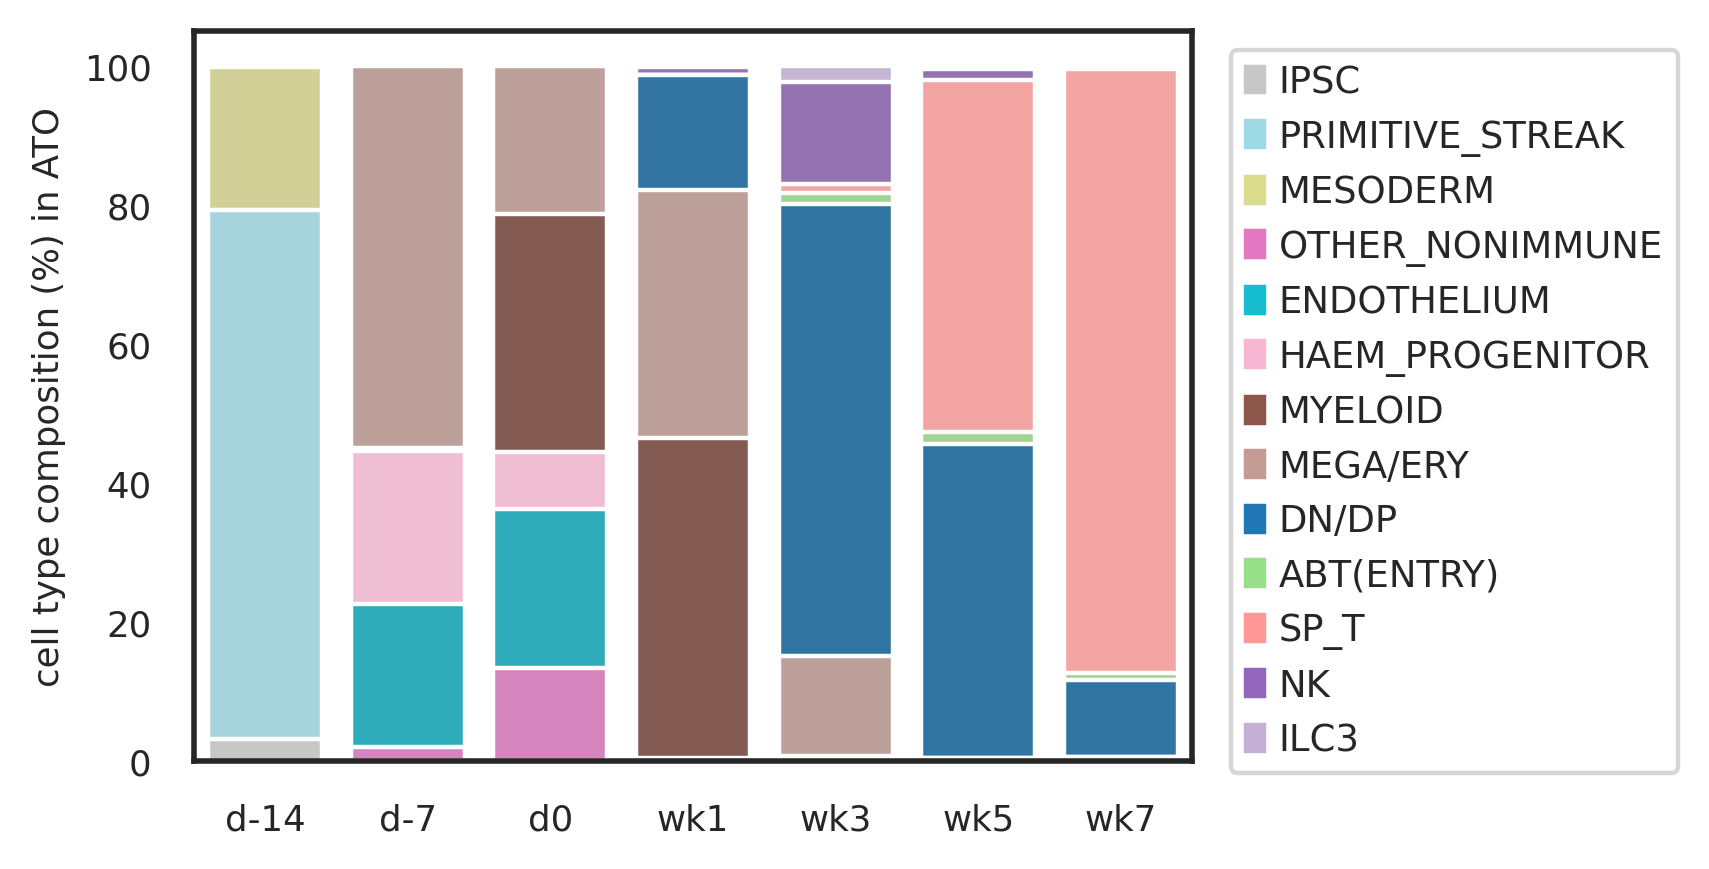

In [29]:
#plt.rcParams["figure.figsize"] = [6,6]
import matplotlib.patches as mpatches
sb.set_theme(style="white")
#color = vega_20_scanpy
plt.figure(figsize=(4, 3))

legend = []

for i in range(df.shape[1]-1)[::-1]:
    ct = df.columns[i]
    ct_color = ato_cmap[ct]
    bar = sb.barplot(x='ATO_days',  y=np.sum(df.iloc[:,0:i+1],axis=1), data=df, color=ct_color)
    legend = legend+[mpatches.Patch(color=ct_color, label=df.columns[i])]
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
bar.set_xlabel("")
bar.set_ylabel('cell type composition (%) in ATO', fontsize=8)
# add legend
plt.legend(handles=legend[::-1],bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='x-small')

plt.savefig(fig_path+'ATO_composition.pdf',bbox_inches='tight');

# Dot plot for each lineage

### T lineage

In [22]:
T = sc.read('/lustre/scratch117/cellgen/team205/ds40/shared/ToChenqu_16122021/DataObjects/ATO_subset_T_5.h5ad')

In [23]:
T.obs_names = T.obs['sanger_sample_id'].astype('str') +'-'+ [name.split('-')[0] for name in T.obs_names]

In [24]:
T.obs['new_annotation'] = adata.obs.loc[T.obs_names, 'new_annotation'].astype('str')

In [25]:
T.obs['new_annotation'] =T.obs['new_annotation'].astype('category')
T.obs['new_annotation'] =T.obs['new_annotation'].cat.reorder_categories(['DN(EARLY)_T', 'DN_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)', 'SP_T',
                                                                         'NK','ILC3'])

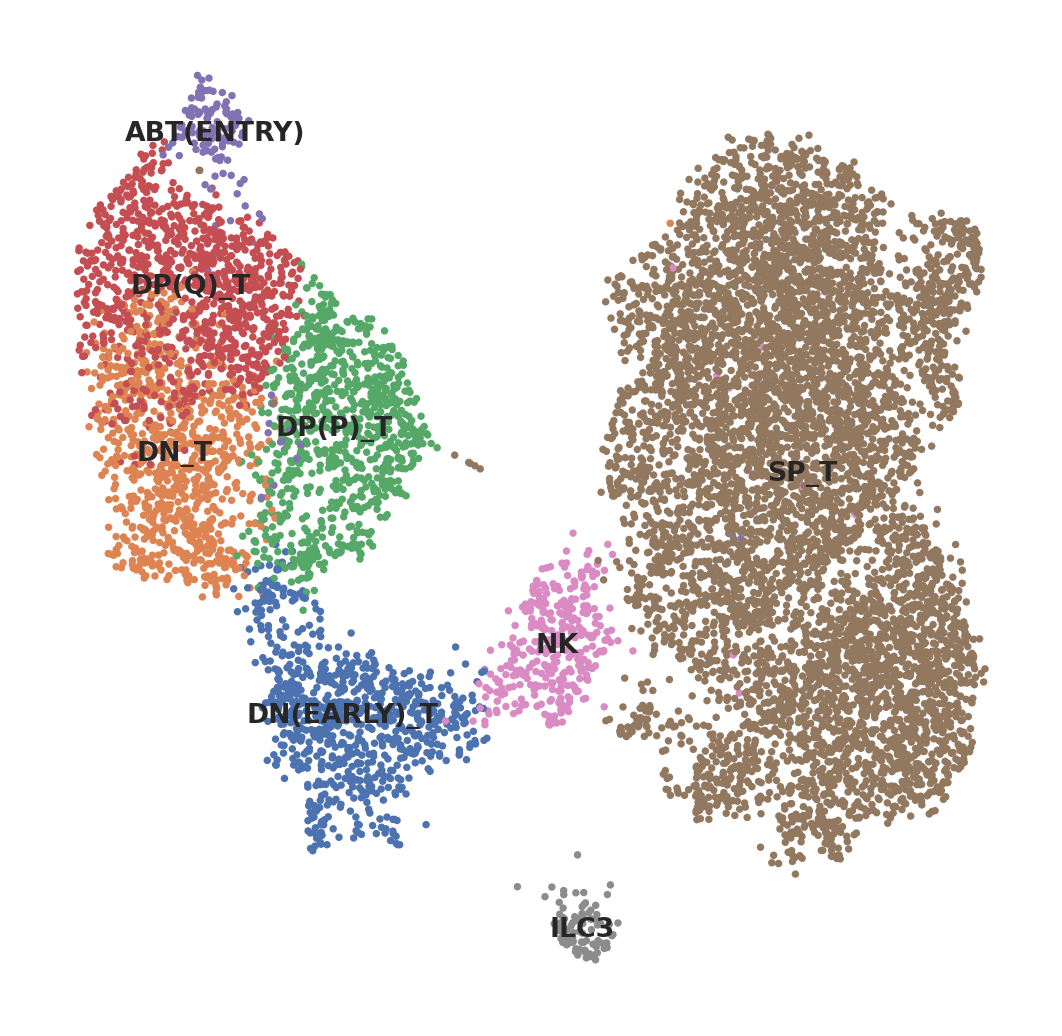

In [26]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(T, color=['new_annotation'],title=[''],legend_loc='on data',frameon=False,legend_fontsize=6,save='annotation_T.pdf')

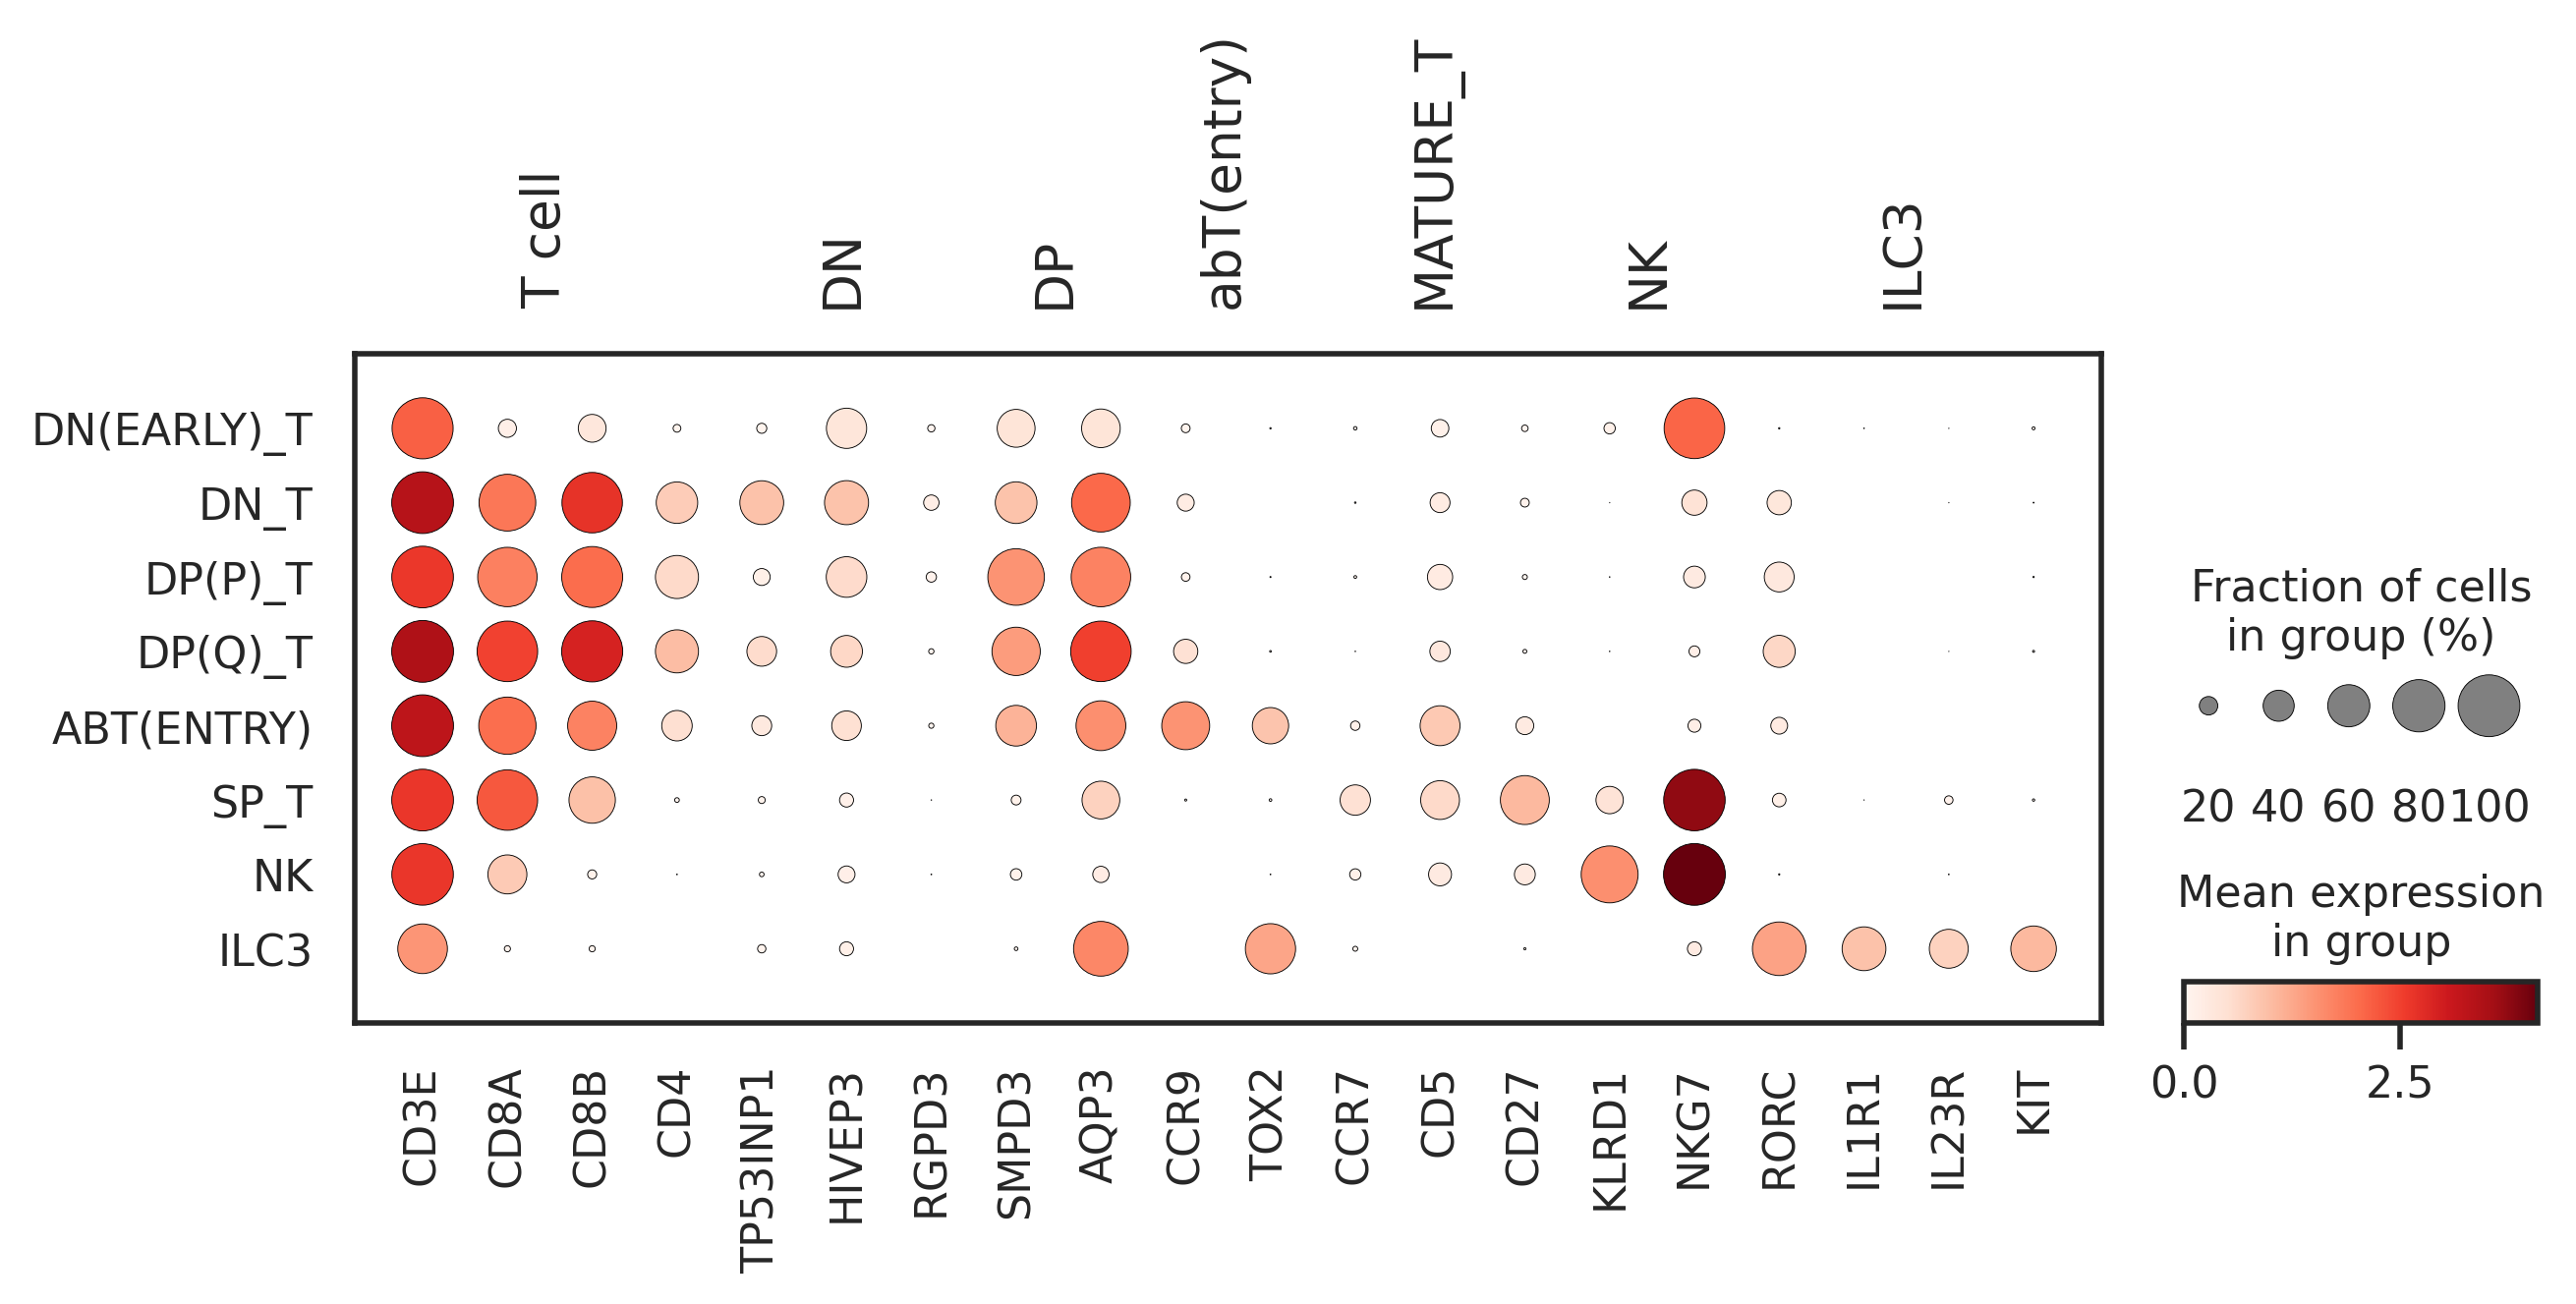

In [27]:
markers = {'T cell':['CD3E','CD8A','CD8B','CD4'],
           'DN':['TP53INP1','HIVEP3','RGPD3'],
           'DP':['SMPD3','AQP3'], 
           'abT(entry)':['CCR9','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27'], 
           'NK': ['KLRD1','NKG7'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT']
          }
sc.pl.dotplot(T, var_names = markers, groupby='new_annotation',save='T_marker.pdf')

### Other immune lineage 

In [28]:
other_immune = sc.read('/lustre/scratch117/cellgen/team205/ds40/shared/ToChenqu_16122021/DataObjects/ATO_subset_other_immune_5.h5ad')

In [29]:
other_immune.obs_names = other_immune.obs['sanger_sample_id'].astype('str') +'-'+ [name.split('-')[0] for name in other_immune.obs_names]

In [30]:
other_immune.obs['new_annotation'] = adata.obs.loc[other_immune.obs_names, 'new_annotation'].astype('str')

In [31]:
other_immune.obs['new_annotation'] =other_immune.obs['new_annotation'].astype('category')
other_immune.obs['new_annotation'] =other_immune.obs['new_annotation'].cat.reorder_categories(['HSC_MPP','HSC_MPP/LMPP_MLP/DC2','CMP','GMP/MONOCYTE','MYELOCYTE','NEUTROPHIL','EOSINOPHIL_BASOPHIL','MAST CELL',
                                                                         'MONOCYTE','MONOCYTE/MACROPHAGE','MEP','EARLY_ERY','MID_ERY','YS_ERY','MK'])

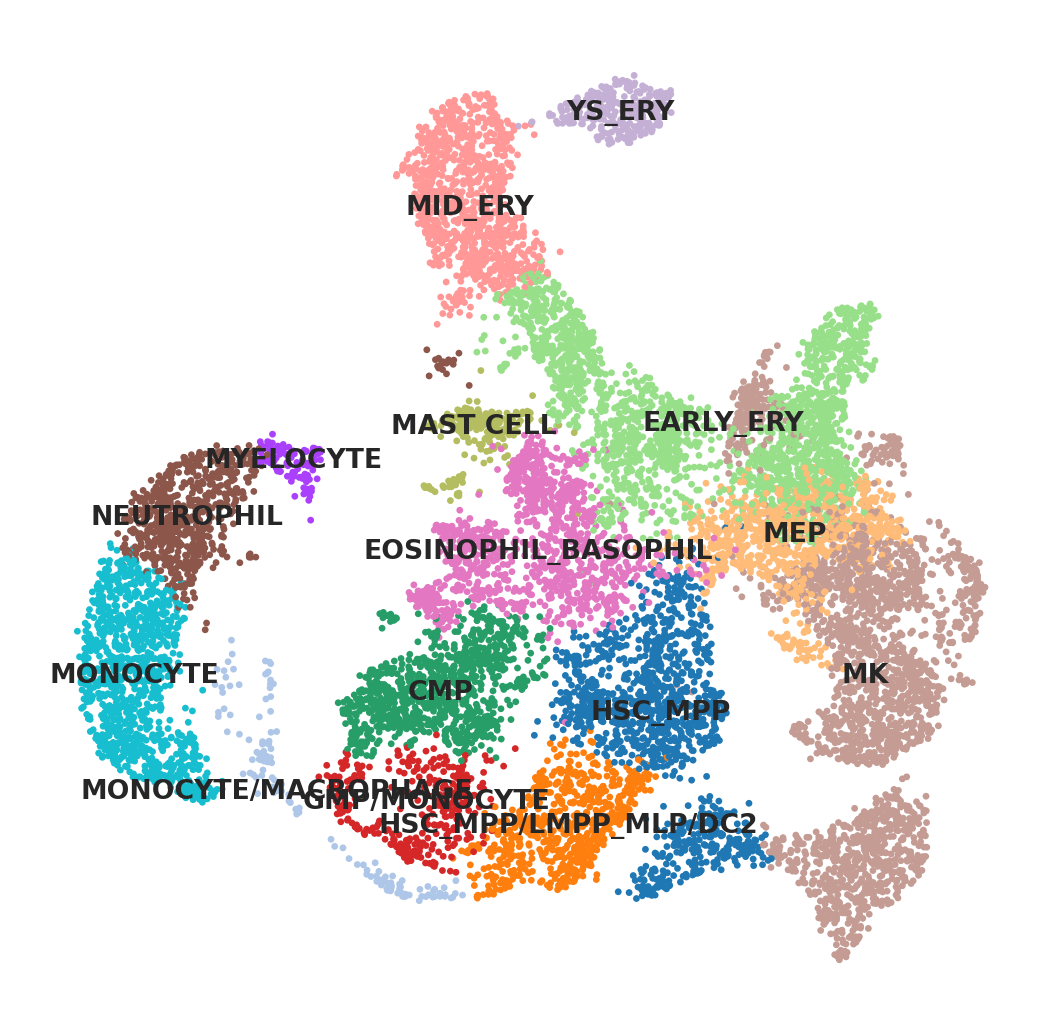

In [32]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(other_immune, color=['new_annotation'],title=[''],legend_loc='on data',frameon=False,legend_fontsize=6,save='annotation_other_immune.pdf')

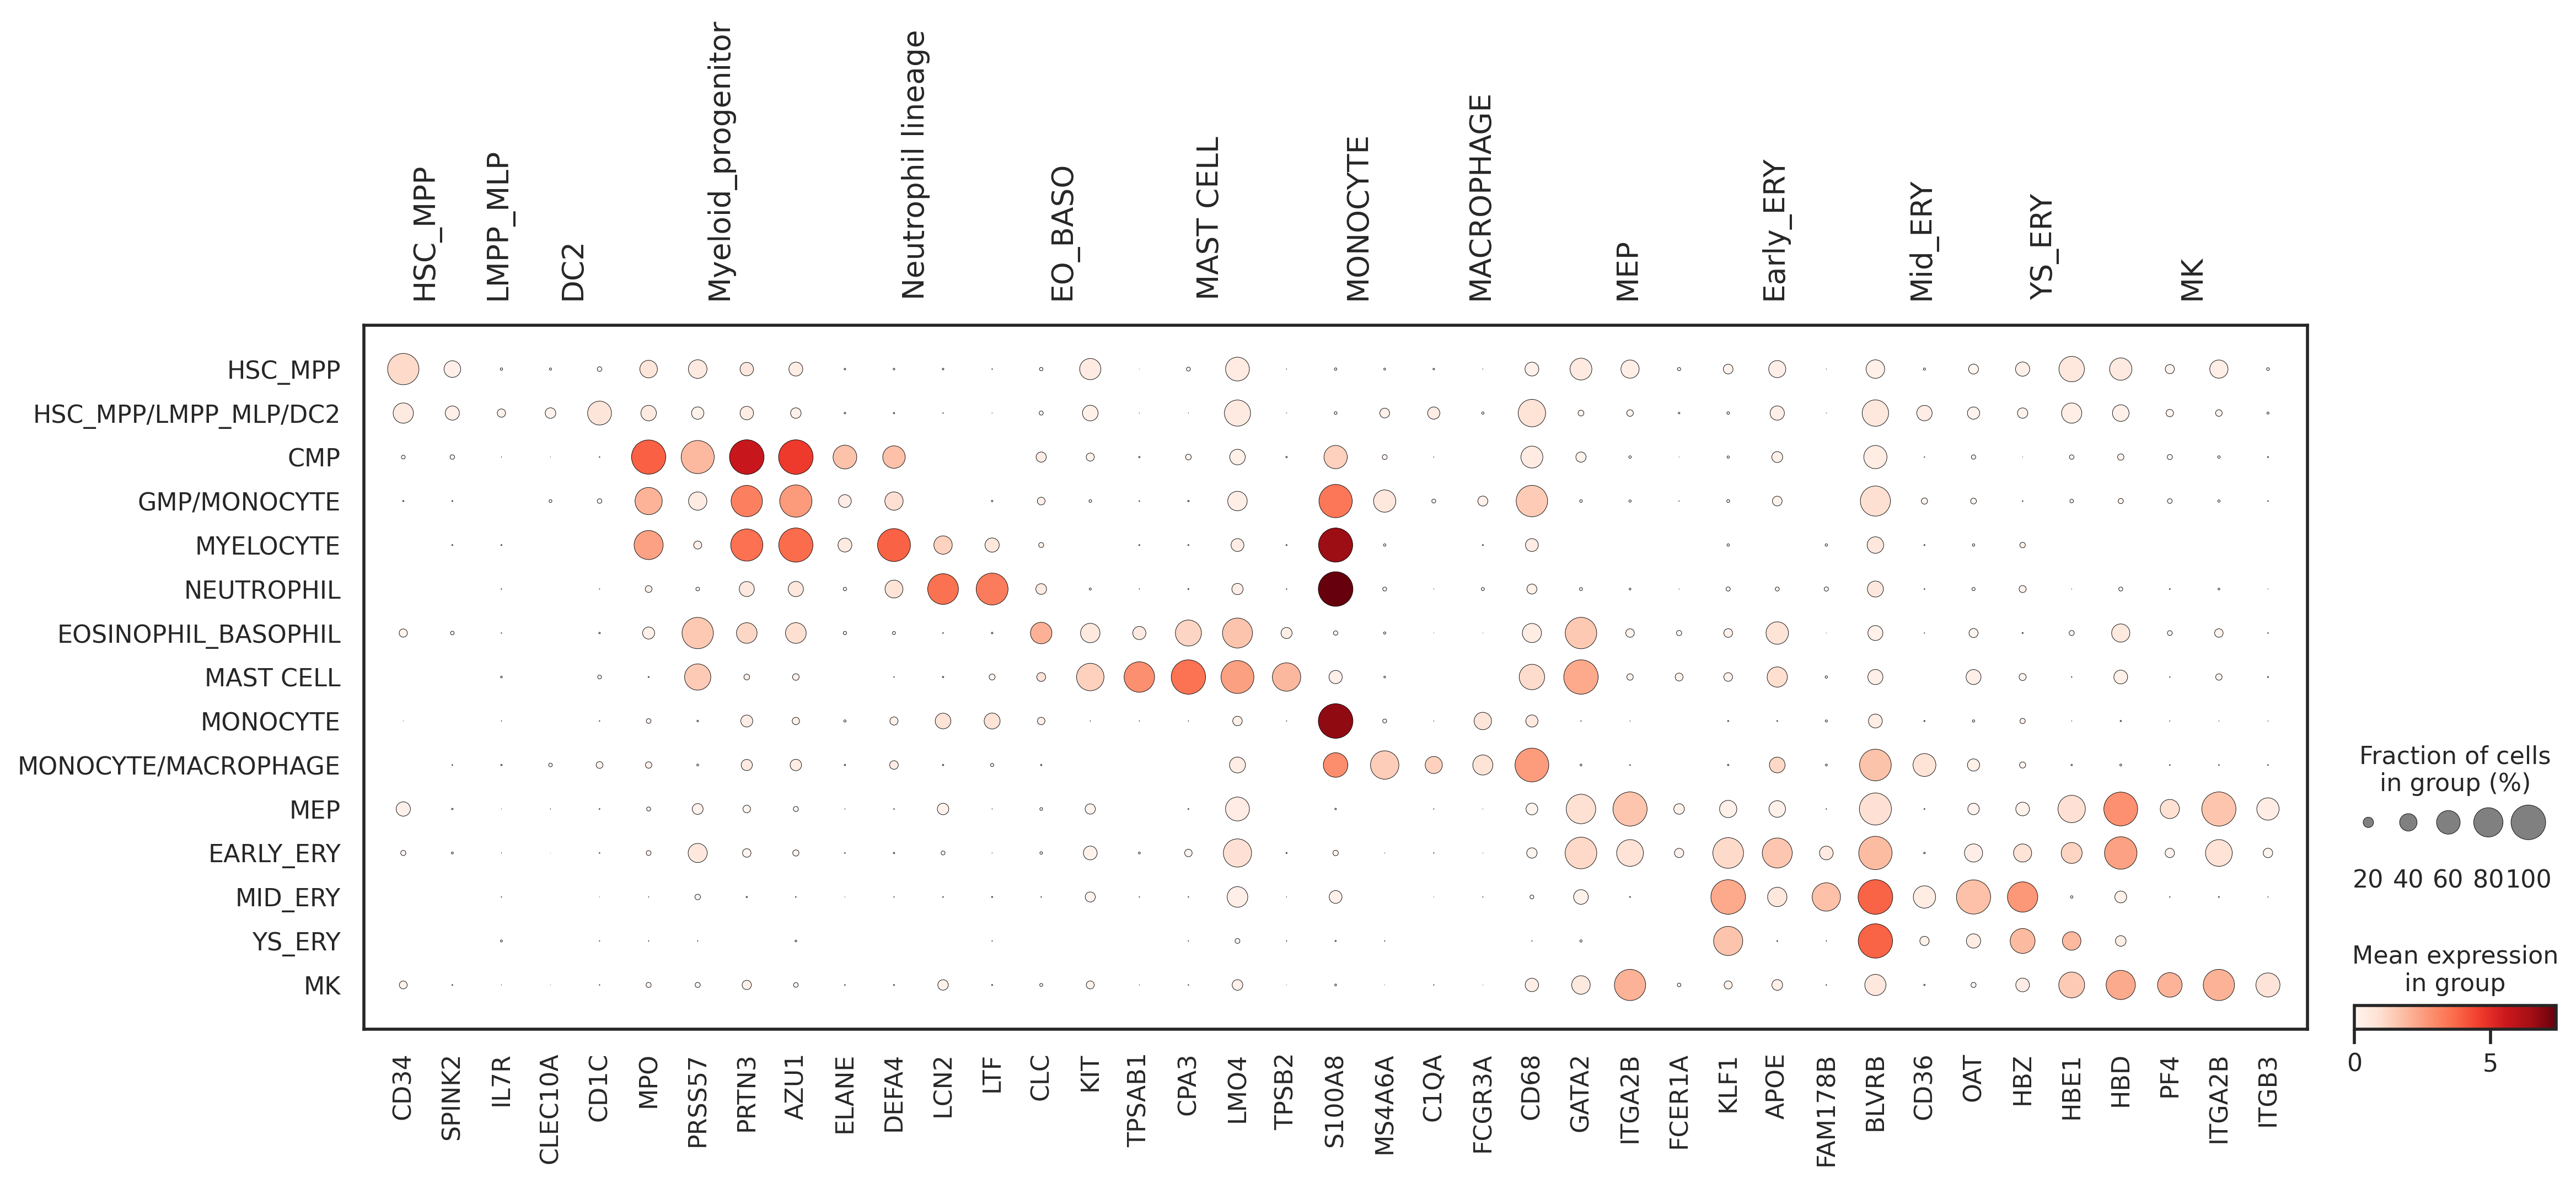

In [33]:
markers = {'HSC_MPP':['CD34','SPINK2'],
           'LMPP_MLP':['IL7R'],
           'DC2':["CLEC10A","CD1C"],
           'Myeloid_progenitor':['MPO',"PRSS57",	"PRTN3",	"AZU1",], #CMP trace of SPINK2, GMP no SPINK2. both express PRSS57, PRTN3, AZU1
		   'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF"],
		   'EO_BASO':["CLC",	"KIT"],
		   'MAST CELL': ['TPSAB1','CPA3','LMO4','TPSB2'],
		   'MONOCYTE':["S100A8",	"MS4A6A"],
		   'MACROPHAGE':['C1QA', 'FCGR3A','CD68'],
		   'MEP':['GATA2','ITGA2B','FCER1A'],
		   "Early_ERY":['KLF1','APOE','FAM178B'],
		   "Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
		   "YS_ERY" : ['HBZ','HBE1'],
		   "MK":['HBD','PF4','ITGA2B','ITGB3']
		   }
sc.pl.dotplot(other_immune, markers, 'new_annotation', dendrogram=False, use_raw=True,save='other_immmune_marker.pdf')

### Non immune lineage 

In [34]:
non_immune = sc.read('/lustre/scratch117/cellgen/team205/ds40/shared/ToChenqu_16122021/DataObjects/ATO_subset_non_immune_5.h5ad')

In [35]:
non_immune.obs_names = non_immune.obs['sanger_sample_id'].astype('str') +'-'+ [name.split('-')[0] for name in non_immune.obs_names]

In [36]:
non_immune.obs['new_annotation'] = adata.obs.loc[non_immune.obs_names, 'new_annotation'].astype('str')

In [37]:
non_immune.obs['new_annotation'] =non_immune.obs['new_annotation'].astype('category')
non_immune.obs['new_annotation'] =non_immune.obs['new_annotation'].cat.reorder_categories(['IPSC','PRIMITIVE_STREAK','MESODERMAL_PROGENITOR','ENDOTHELIUM','VSMC_PERICYTE',
 'EPITHELIUM',
 'GLIAL','NEURON_PROGENITOR'])

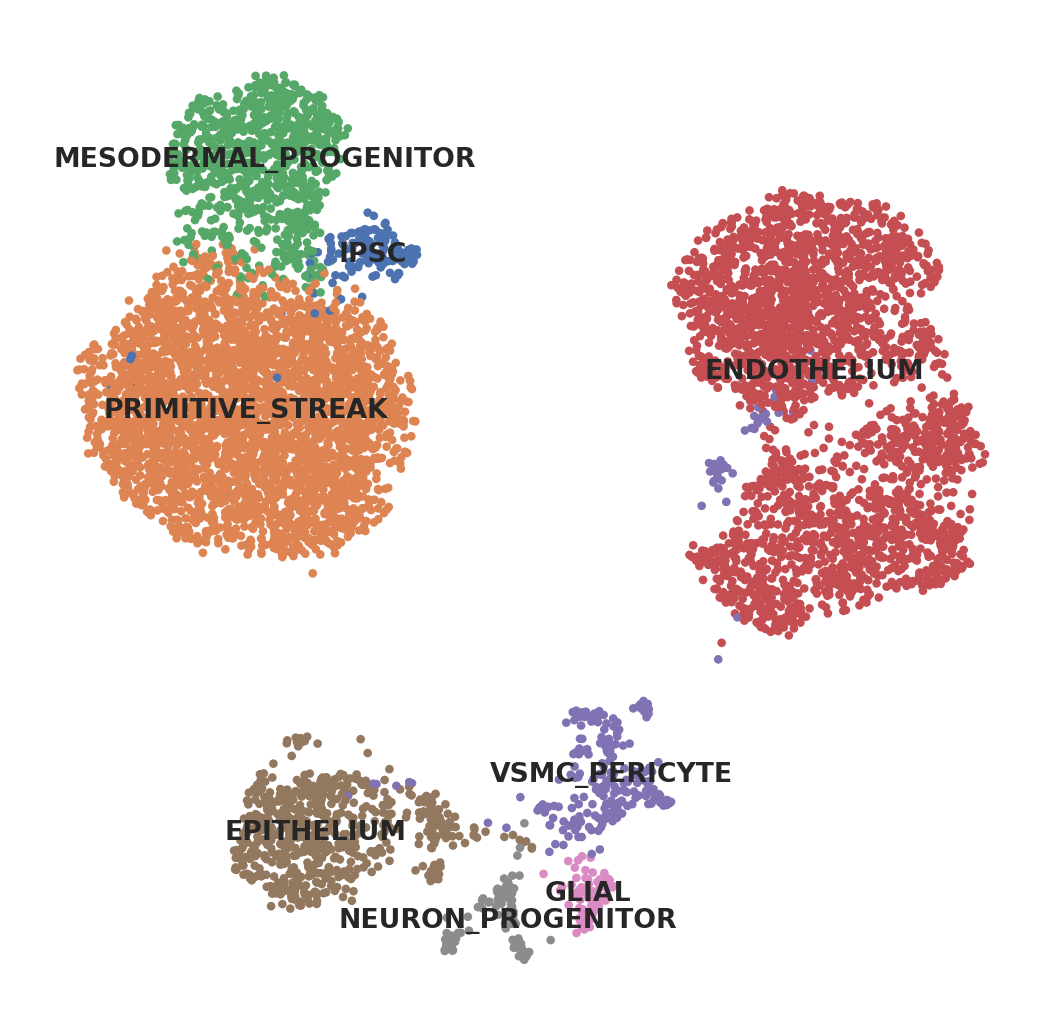

In [38]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(non_immune, color=['new_annotation'],title=[''],legend_loc='on data',frameon=False,legend_fontsize=6,save='annotation_non_immune.pdf')

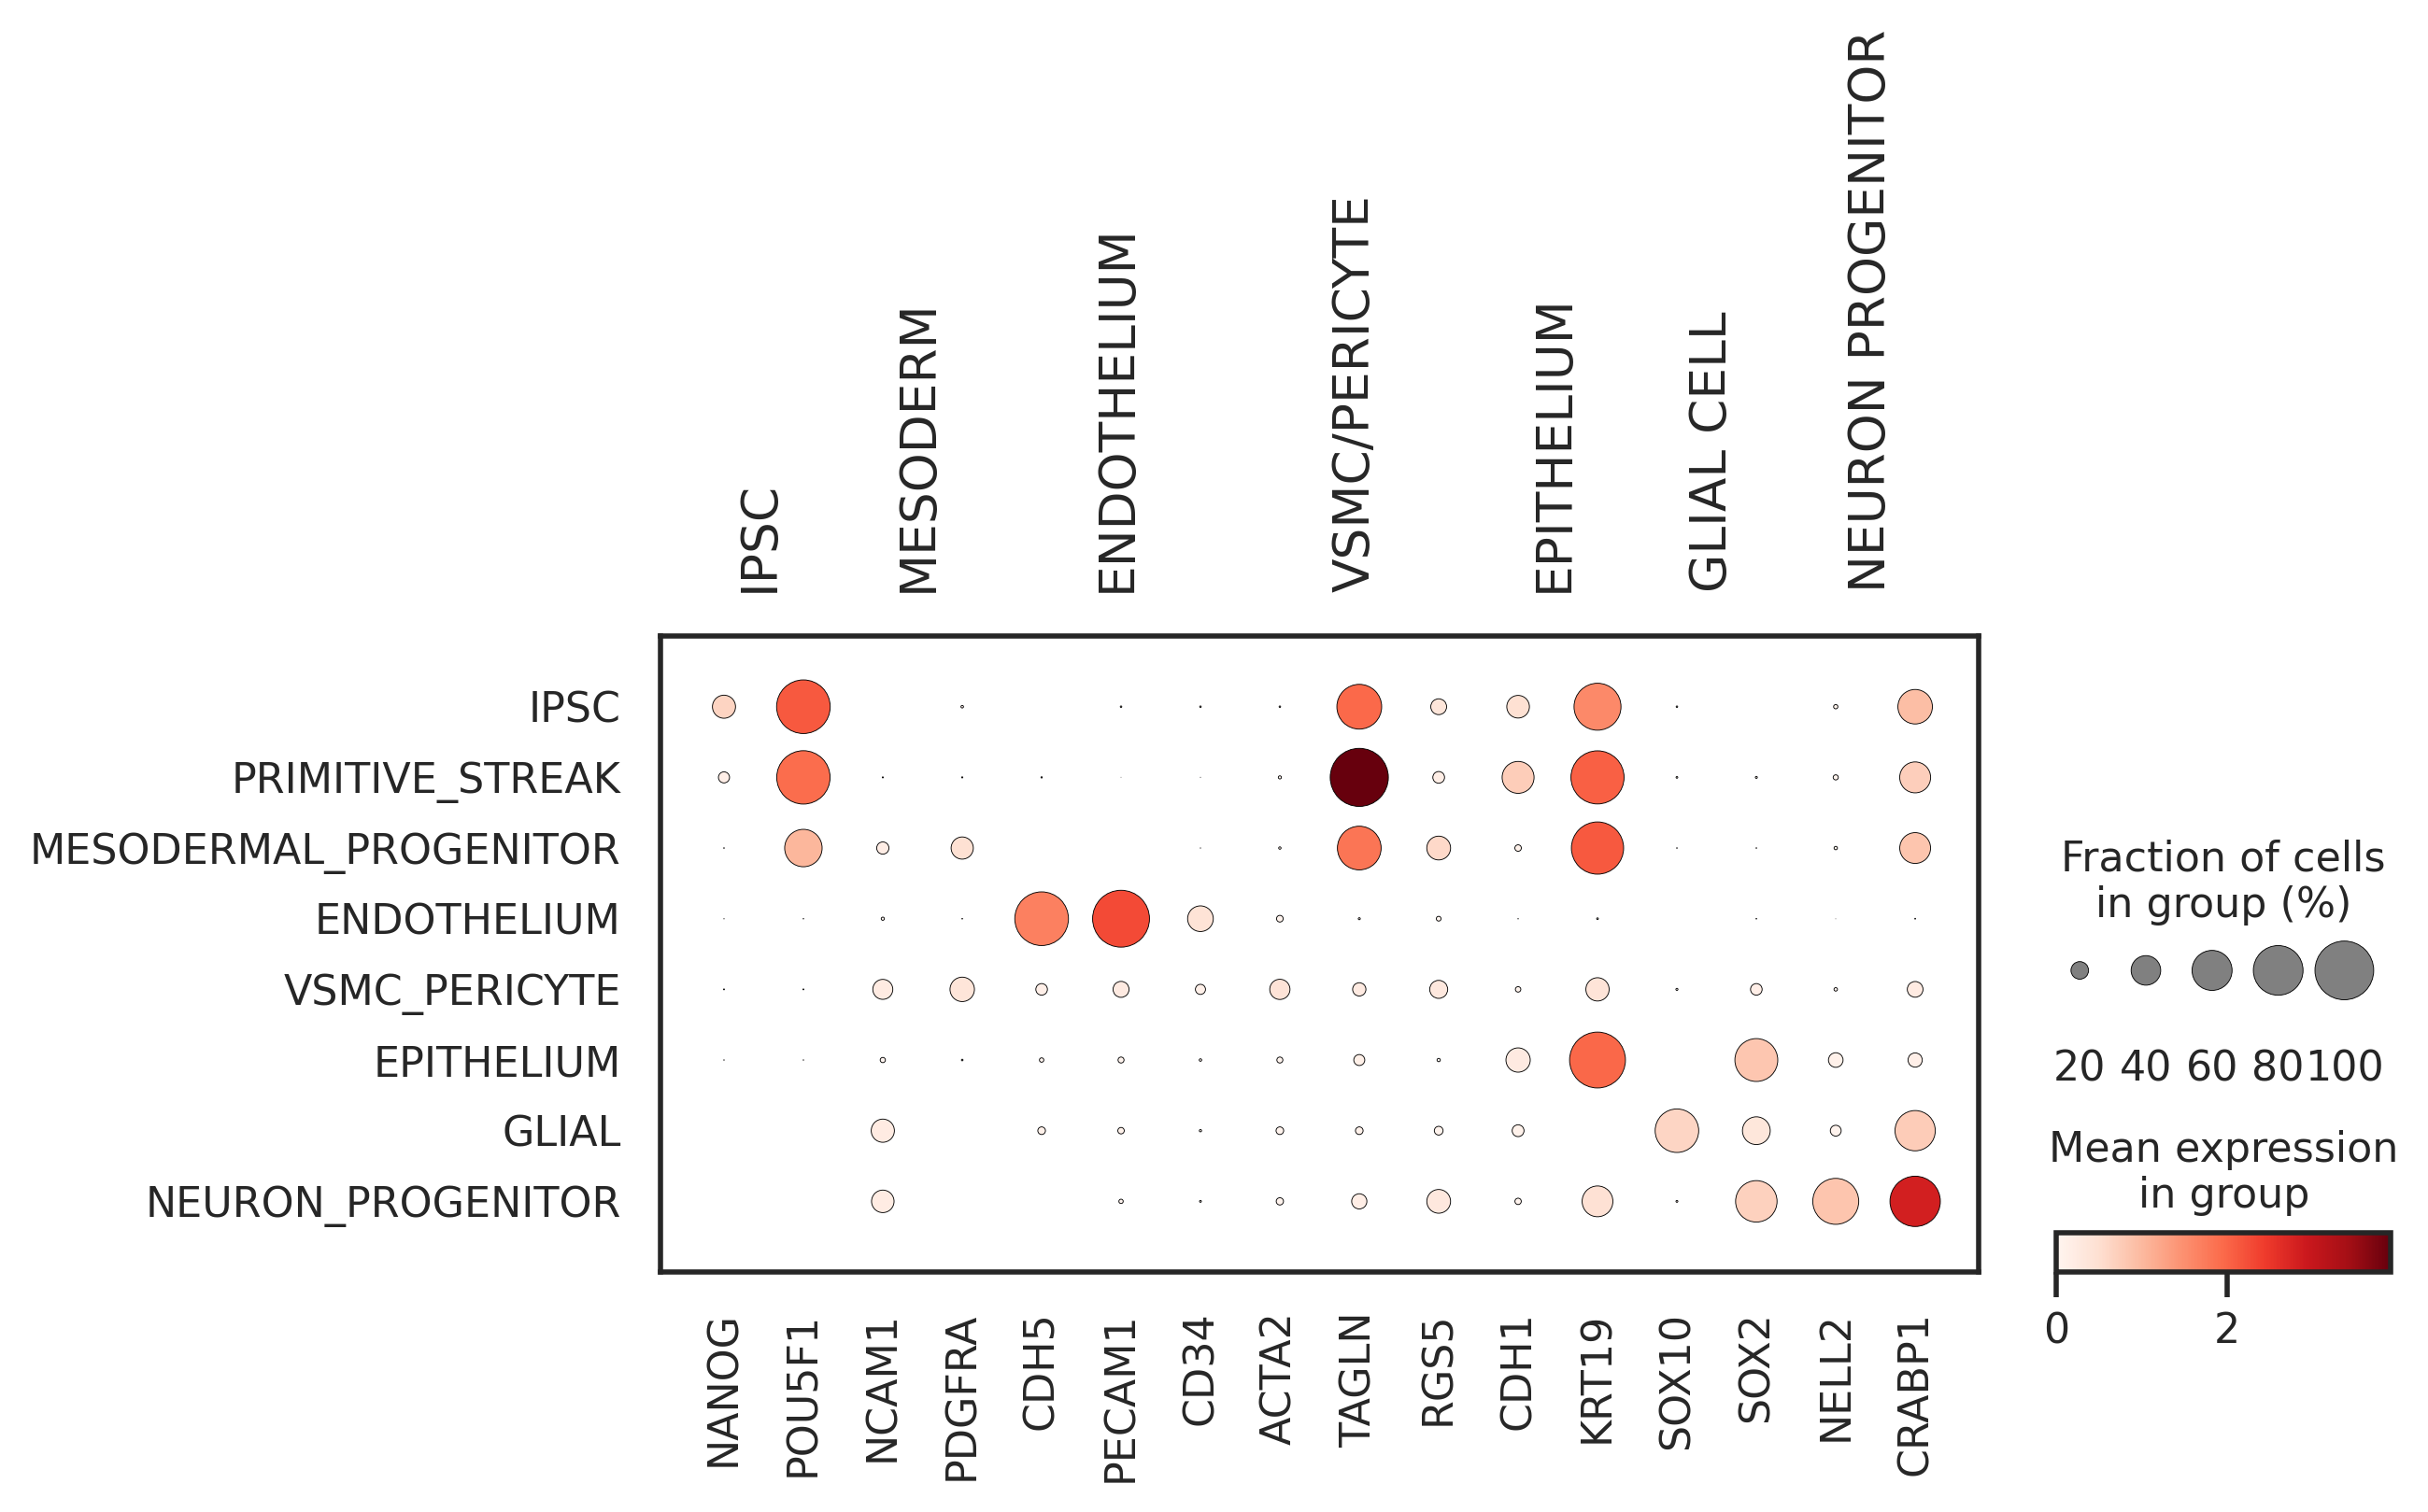

In [39]:
markers = {'IPSC':['NANOG','POU5F1'],
           'MESODERM':['NCAM1','PDGFRA'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'EPITHELIUM':['CDH1','KRT19',],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON PROGENITOR':['NELL2','CRABP1']}
sc.pl.dotplot(non_immune, markers, 'new_annotation', dendrogram=False, use_raw=True,save='non_immmune_marker.pdf')